<a href="https://colab.research.google.com/github/princeAnalyst-ML/AndelaLearningCommunity/blob/main/Diabetes_dataset_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np

In [24]:
from google.colab import files


In [25]:
upload=files.upload()

Saving diabetes.csv to diabetes (1).csv


In [26]:
from IPython.core.display import display_jpeg
dia=pd.read_csv("diabetes.csv")
dia.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [28]:
Group_data = [
    (dia['Age'] <= 25),
    (dia['Age'] > 25) & (dia['Age'] <= 35),
    (dia['Age'] > 35) & (dia['Age'] <= 45),
    (dia['Age'] > 45)
    ]

# create a list of the values we want to assign for each condition
values = ['A', 'B', 'C', 'D']

# create a new column and use np.select to assign values to it using our lists as arguments
dia['Group'] = np.select(Group_data, values)

# display updated DataFrame
dia.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Group
0,6,148,72,35,0,33.6,0.627,50,1,D
1,1,85,66,29,0,26.6,0.351,31,0,B
2,8,183,64,0,0,23.3,0.672,32,1,B
3,1,89,66,23,94,28.1,0.167,21,0,A
4,0,137,40,35,168,43.1,2.288,33,1,B


In [29]:
dia.columns
cols_to_norm=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']
dia[cols_to_norm]=dia[cols_to_norm].apply(lambda x:(x-x.min())/(x.max()-x.min()))

In [30]:
import tensorflow as tf
Preg=tf.feature_column.numeric_column('Pregnancies')
Gluco=tf.feature_column.numeric_column('Glucose')
BldPre=tf.feature_column.numeric_column('BloodPressure')
SkinT=tf.feature_column.numeric_column('SkinThickness')
Insu=tf.feature_column.numeric_column('Insulin')
BMI=tf.feature_column.numeric_column('BMI')
Pedi=tf.feature_column.numeric_column('DiabetesPedigreeFunction')
Age=tf.feature_column.numeric_column('Age')

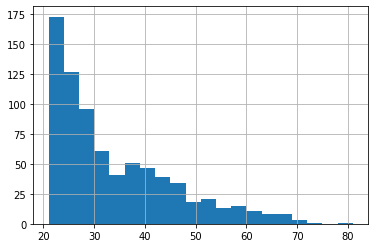

In [31]:
from ast import increment_lineno
# categorical features
assigned_group=tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])
#convert continuous to categorical
import matplotlib.pyplot as plt
%matplotlib inline
dia['Age'].hist(bins=20)


In [32]:
age_buckets=tf.feature_column.bucketized_column(Age,boundaries=[20,30,40,50,60,70,80])

#combining all features.
feat_cols=[Preg,Gluco,BldPre,SkinT,Insu,BMI,Pedi,assigned_group,age_buckets]

#splitting the data
x_data=dia.drop('Outcome',axis=1)
labels=dia['Outcome']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x_data,labels,test_size=0.33,random_state=101)

In [33]:
#Applying input function
input_func=tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)
#creating the model
model=tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)
model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp_s4fq2r4', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.7/dist-packages/tensorflow_estimator/python/estimator/canned/linear.py:1478: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  getter=tf.compat.v1.get_variable)


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp_s4fq2r4/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 0.6931472, step = 0
INFO:tensorflow:global_step/sec: 322.988
INFO:tensorflow:loss = 0.4508347, step = 100 (0.311 sec)
INFO:tensorflow:global_step/sec: 446.749
INFO:tensorflow:loss = 0.43246642, step = 200 (0.230 sec)
INFO:tensorflow:global_step/sec: 393.72
INFO:tensorflow:loss = 0.77412915, step = 300 (0.252 sec)
INFO:tensorflow:global_step/sec: 3

In [34]:
pred_input_func=tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_test, batch_size=10,num_epochs=1,shuffle=False)
predictions=model.predict(pred_input_func)
list(predictions)

INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.7/dist-packages/tensorflow_estimator/python/estimator/canned/linear.py:1478: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  getter=tf.compat.v1.get_variable)


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp_s4fq2r4/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'all_class_ids': array([0, 1], dtype=int32),
  'all_classes': array([b'0', b'1'], dtype=object),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.5132559], dtype=float32),
  'logits': array([0.05303597], dtype=float32),
  'probabilities': array([0.48674414, 0.5132559 ], dtype=float32)},
 {'all_class_ids': array([0, 1], dtype=int32),
  'all_classes': array([b'0', b'1'], dtype=object),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.5991157], dtype=float32),
  'logits': array([0.40178216], dtype=float32),
  'probabilities': array([0.40088427, 0.5991158 ], dtype=float32)},
 {'all_class_ids': array([0, 1], dtype=int32),
  'all_classes': array([b'0', b'1'], dtype=object),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.40774345], dtype=float32),
  'logits': array([-0.37330174], dtype=float32),
  'probabilities': array([0.59225655, 0.40774345], dtype=float32)},

In [35]:
# Evaluating our model.
eval_input_func=tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,num_epochs=1,shuffle=False)
results=model.evaluate(eval_input_func)
results

INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.7/dist-packages/tensorflow_estimator/python/estimator/canned/linear.py:1478: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  getter=tf.compat.v1.get_variable)


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-12-21T12:45:51
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp_s4fq2r4/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 1.99350s
INFO:tensorflow:Finished evaluation at 2021-12-21-12:45:53
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.71259844, accuracy_baseline = 0.6574803, auc = 0.7729369, auc_precision_recall = 0.6249858, average_loss = 0.5392188, global_step = 1000, label/mean = 0.34251967, loss = 0.5447114, precision = 0.58536583, prediction/mean = 0.37548324, recall = 0.55172414
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmp_s4fq2r4/model.ckpt-1000


{'accuracy': 0.71259844,
 'accuracy_baseline': 0.6574803,
 'auc': 0.7729369,
 'auc_precision_recall': 0.6249858,
 'average_loss': 0.5392188,
 'global_step': 1000,
 'label/mean': 0.34251967,
 'loss': 0.5447114,
 'precision': 0.58536583,
 'prediction/mean': 0.37548324,
 'recall': 0.55172414}